In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [3]:
df = pd.read_csv('../Datasets/states_cumulative/Andhra Pradesh.csv', index_col = 'Date', parse_dates = True)
df.drop(['State','Year','Month'],axis=1,inplace=True)
df.fillna(0)
df.head()

,Average
Date,
2009-01-01,0.270486
2009-01-02,0.000000
2009-01-03,0.000000
2009-01-04,0.000000
2009-01-05,0.000000


In [4]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Define sequence length and features
sequence_length = 10  # Number of time steps in each sequence
num_features = len(df.columns)

# Create sequences and corresponding labels
sequences = []
labels = []
for i in range(len(scaled_data) - sequence_length + 1):
    seq = scaled_data[i:i+sequence_length]
    label = scaled_data[i+sequence_length-1][0]
    sequences.append(seq)
    labels.append(label)

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split into train and test sets
train_size = int(0.8 * len(sequences))
train_x, test_x = sequences[:train_size], sequences[train_size:]
train_y, test_y = labels[:train_size], labels[train_size:]

print("Train X shape:", train_x.shape)
print("Train Y shape:", train_y.shape)
print("Test X shape:", test_x.shape)
print("Test Y shape:", test_y.shape)

Train X shape: (4303, 10, 1)
Train Y shape: (4303,)
Test X shape: (1076, 10, 1)
Test Y shape: (1076,)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Create the LSTM model
model = Sequential()

# Add LSTM layers with dropout
model.add(LSTM(units=128, input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.2))

# Add a dense output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

c:\Users\Manasa Swamireddy\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,417 (501.63 KB)

 Trainable params: 128,417 (501.63 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_weights.keras', monitor='accuracy',mode='max', save_best_only=True)

# Train the model
history = model.fit(
    train_x, train_y,
    epochs=100,
    batch_size=32,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[model_checkpoint]
)

print("\nModel accuracy: ", max(history.history["accuracy"]))



Epoch 1/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.3628 - loss: 2.4955e-05 - val_accuracy: 0.1800 - val_loss: 6.8130e-06
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3605 - loss: 7.0397e-06 - val_accuracy: 0.1800 - val_loss: 4.9793e-06
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.3539 - loss: 1.3833e-05 - val_accuracy: 0.1800 - val_loss: 6.1566e-07
Epoch 4/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.3567 - loss: 8.9129e-06 - val_accuracy: 0.1800 - val_loss: 5.4289e-07
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3551 - loss: 5.4446e-06 - val_accuracy: 0.1800 - val_loss: 3.1456e-07
Epoch 6/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3529 - loss: 1.9243e-05 - val_accuracy: 0.1800 - val_loss: 7.4003e-06
Epoch 7/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.3606 - loss: 6.4788e-06 - val_accuracy: 0.1800 - val_loss: 4.0099e-06
Epoch 8/100
108/108 ━━━━━━━━━━━━━━

In [7]:
best_model = tf.keras.models.load_model('best_model_weights.keras')
test_loss = best_model.evaluate(test_x, test_y)
print("Test Loss:", test_loss)

print(history.history.keys())

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3034 - loss: 4.1091e-07
Test Loss: [4.94777339099528e-07, 0.2118959128856659]
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


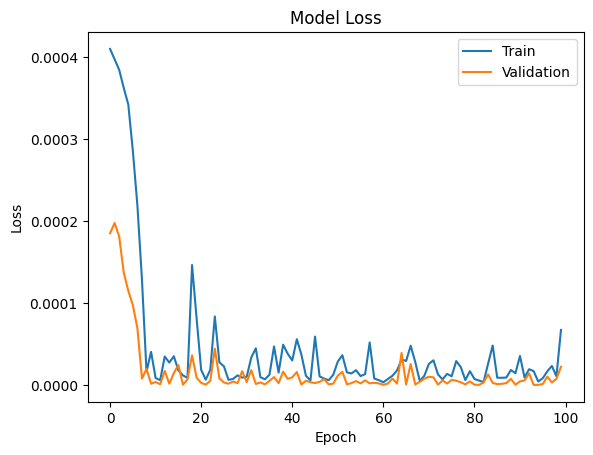

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

predictions = best_model.predict(test_x)

# Calculate evaluation metrics
mae = mean_absolute_error(test_y, predictions)
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
Mean Absolute Error (MAE): 0.00035984606654680326
Mean Squared Error (MSE): 4.947773245244996e-07
Root Mean Squared Error (RMSE): 0.0007034040976028641


In [10]:
# y_true values
test_y_copies = np.repeat(test_y.reshape(-1, 1), test_x.shape[-1], axis=-1)
true_rainfall = scaler.inverse_transform(test_y_copies)[:]

# predicted values
prediction = best_model.predict(test_x)
prediction_copies = np.repeat(prediction, 9, axis=-1)
predicted_rainfall = scaler.inverse_transform(prediction_copies)[:,6]

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


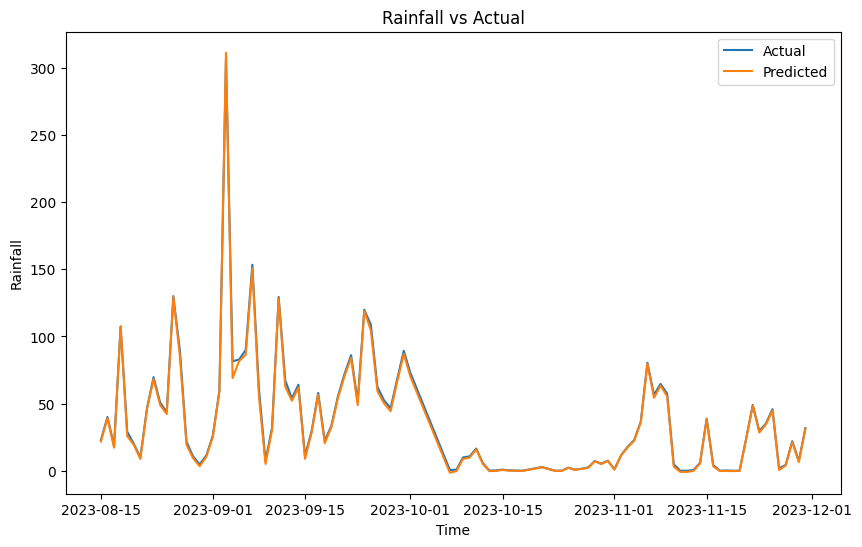

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(df.index[-100:], true_rainfall[-100:], label='Actual')
plt.plot(df.index[-100:], predicted_rainfall[-100:], label='Predicted')
plt.title('Rainfall vs Actual')
plt.xlabel('Time')
plt.ylabel('Rainfall')
plt.legend()
plt.show()